In [ ]:
!pip install trendln
!pip install yfinance

In [264]:
#yfinanceとpandasをインポート
import yfinance as yf
import pandas as pd
import trendln
import matplotlib.pyplot as plt

#取得するデータ詳細
name = 'BTC-USD'
start = '2022-11-01'
end = '2022-12-31'

#データのダウンロード
df = yf.download(tickers=name, start=start, end=end)
df.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-01,20494.898438,20647.289062,20359.845703,20485.273438,20485.273438,39819303159
2022-11-02,20482.958984,20742.810547,20087.134766,20159.503906,20159.503906,55552169483
2022-11-03,20162.689453,20382.095703,20086.240234,20209.988281,20209.988281,43228750179


In [265]:
minimaIdxs, maximaIdxs = trendln.get_extrema(df['Close'], accuracy=2)
print(minimaIdxs)
print(maximaIdxs)


[1, 8, 12, 15, 20, 27, 32, 36, 40, 45, 48, 52, 57]
[4, 9, 14, 18, 22, 29, 33, 37, 43, 46, 49, 55, 58]


In [266]:
# インデックスに対応するデータポイントを抽出
mins_points = df.iloc[minimaIdxs]['Close']
maxs_points = df.iloc[maximaIdxs]['Close']

df_combined = pd.concat([mins_points, maxs_points], axis=1)
df_combined.columns = ['mins_points', 'maxs_points']
df_combined.head()

,mins_points,maxs_points
Date,,
2022-11-02,20159.503906,NaN
2022-11-05,NaN,21282.691406
2022-11-09,15880.780273,NaN
2022-11-10,NaN,17586.771484
2022-11-13,16353.365234,NaN


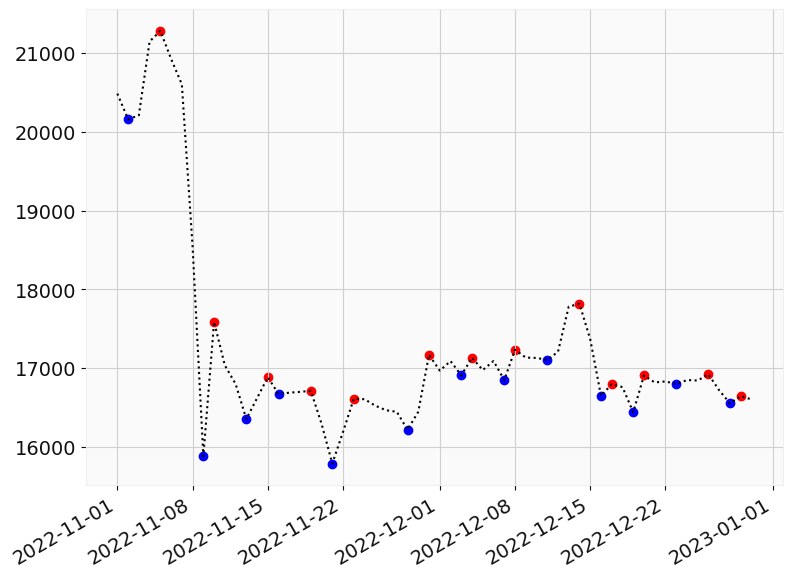

In [267]:
# グラフのサイズを設定
plt.figure(figsize=(9, 7))

# 終値を表示
plt.plot(df['Close'], linestyle='dotted', color='black')
#転換点を表示
plt.scatter(mins_points.index, mins_points.values, color='blue')
plt.scatter(maxs_points.index, maxs_points.values, color='red')

# プロットの表示
plt.gcf().autofmt_xdate()
plt.show()


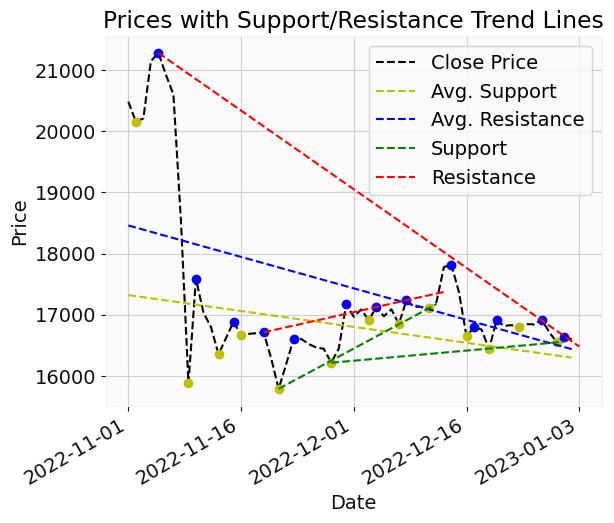

In [250]:
fig = trendln.plot_sup_res_date(df["Close"], df["Close"].index, accuracy=2)